exam 18 과 달리 이번에는 전체 데이터를 활용하여 작업을 진행하겠습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
raw_data = pd.read_csv('./datasets/samsung202401.csv')
print(raw_data.head())
raw_data.info()

         Date    Open    High     Low   Close    Adj Close    Volume
0  2000-01-04  6000.0  6110.0  5660.0  6110.0  4514.580078  74195000
1  2000-01-05  5800.0  6060.0  5520.0  5580.0  4122.972168  74680000
2  2000-01-06  5750.0  5780.0  5580.0  5620.0  4152.526855  54390000
3  2000-01-07  5560.0  5670.0  5360.0  5540.0  4093.415283  40305000
4  2000-01-10  5600.0  5770.0  5580.0  5770.0  4263.360840  46880000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6033 entries, 0 to 6032
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6033 non-null   object 
 1   Open       6033 non-null   float64
 2   High       6033 non-null   float64
 3   Low        6033 non-null   float64
 4   Close      6033 non-null   float64
 5   Adj Close  6033 non-null   float64
 6   Volume     6033 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 330.1+ KB


In [3]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6033 entries, 0 to 6032
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6033 non-null   datetime64[ns]
 1   Open       6033 non-null   float64       
 2   High       6033 non-null   float64       
 3   Low        6033 non-null   float64       
 4   Close      6033 non-null   float64       
 5   Adj Close  6033 non-null   float64       
 6   Volume     6033 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 330.1 KB


In [4]:
raw_data.set_index('Date',inplace=True) # 이렇게 바꿔줘서 []이렇게 해도 상관없음.
print(raw_data.head())

              Open    High     Low   Close    Adj Close    Volume
Date                                                             
2000-01-04  6000.0  6110.0  5660.0  6110.0  4514.580078  74195000
2000-01-05  5800.0  6060.0  5520.0  5580.0  4122.972168  74680000
2000-01-06  5750.0  5780.0  5580.0  5620.0  4152.526855  54390000
2000-01-07  5560.0  5670.0  5360.0  5540.0  4093.415283  40305000
2000-01-10  5600.0  5770.0  5580.0  5770.0  4263.360840  46880000


In [5]:
data = raw_data['2021-01-03':'2024-01-22'] # '2021-01-03'~'2024-01-22' 이 사이에 있는 값
print(data.tail())
data.info()
print(data.shape)

               Open     High      Low    Close  Adj Close    Volume
Date                                                               
2024-01-16  73500.0  73700.0  72500.0  72600.0    72600.0  14760415
2024-01-17  73100.0  73300.0  71000.0  71000.0    71000.0  22683660
2024-01-18  71600.0  72000.0  70700.0  71700.0    71700.0  17853397
2024-01-19  73500.0  74700.0  73000.0  74700.0    74700.0  23363427
2024-01-22  75900.0  76000.0  75000.0  75100.0    75100.0  19673375
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2021-01-04 to 2024-01-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       752 non-null    float64
 1   High       752 non-null    float64
 2   Low        752 non-null    float64
 3   Close      752 non-null    float64
 4   Adj Close  752 non-null    float64
 5   Volume     752 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.1 KB
(752, 6)


In [6]:
minmax_scaler = MinMaxScaler()
# minmax_scaler = MinMaxScaler(): Min-Max 스케일링을 위한 MinMaxScaler 객체를 생성합니다.
scaled_data = minmax_scaler.fit_transform(data)
# fit_transform 메서드를 사용하여 데이터를 [0, 1] 범위로 스케일링합니다.
#이때, data는 원본 데이터를 나타냅니다.

# 다시 복원할 때는 inevers transform
print(scaled_data[:5])
print(scaled_data.shape)
# 스케일링된 데이터의 형태(shape)를 출력합니다.
#이는 원본 데이터와 동일한 행렬 형태를 가지지만, 값의 범위가 [0, 1]로 변환되었습니다.

[[0.75526316 0.71296296 0.75331565 0.79166667 0.78096792 0.42804687]
 [0.77105263 0.70138889 0.79045093 0.81510417 0.80560875 0.3912874 ]
 [0.81578947 0.71527778 0.80371353 0.77083333 0.75906453 0.46607014]
 [0.80263158 0.70833333 0.81962865 0.7890625  0.77823002 0.36148847]
 [0.81578947 0.84259259 0.82758621 0.94270833 0.93976585 0.65348029]]
(752, 6)


In [8]:
sequence_x = []
sequence_y = []
# 스케일링된 데이터에서 30일치의 시퀀스로 X, 다음날의 값으로 Y를 만듦
for i in range(len(scaled_data)-30):
  x = scaled_data[i:i+30]
  y = scaled_data[i+30][3] # y는 다 있을 필요 없어서 ~3 까지만 출력
 # 다음날의 값(종가 등)을 Y로 사용 (여기서는 4번째 열의 값, 종가를 예시로 사용)
  sequence_x.append(x)
  sequence_y.append(y)


In [10]:
sequence_x = np.array(sequence_x)
sequence_y = np.array(sequence_y)
print(sequence_x[0])
print(sequence_y[0])
print(sequence_x.shape)
print(sequence_y.shape)


[[0.75526316 0.71296296 0.75331565 0.79166667 0.78096792 0.42804687]
 [0.77105263 0.70138889 0.79045093 0.81510417 0.80560875 0.3912874 ]
 [0.81578947 0.71527778 0.80371353 0.77083333 0.75906453 0.46607014]
 [0.80263158 0.70833333 0.81962865 0.7890625  0.77823002 0.36148847]
 [0.81578947 0.84259259 0.82758621 0.94270833 0.93976585 0.65348029]
 [0.99210526 1.         1.         1.         1.         1.        ]
 [1.         0.875      0.95490716 0.98958333 0.98904797 0.5390818 ]
 [0.98684211 0.87037037 0.98938992 0.96614583 0.96440691 0.39940621]
 [0.95789474 0.84259259 0.97877984 0.96614583 0.96440691 0.29227203]
 [0.98684211 0.88425926 0.9602122  0.921875   0.91786246 0.37020512]
 [0.90263158 0.78009259 0.85676393 0.84375    0.83572582 0.47868211]
 [0.84736842 0.7962963  0.84350133 0.89583333 0.89048351 0.44177536]
 [0.96578947 0.81944444 0.9204244  0.90104167 0.89595975 0.27917389]
 [0.92631579 0.81018519 0.9204244  0.92447917 0.92060058 0.28035747]
 [0.96578947 0.83564815 0.92838196

In [27]:
x_train,x_test,y_train,y_test = train_test_split(sequence_x,sequence_y,test_size=0.2,shuffle=False)
print(x_train.shape,y_train.shape)
print(x_train.shape, y_test.shape)

(577, 30, 6) (577,)
(577, 30, 6) (145,)


In [28]:
model = Sequential()
model.add(GRU(50, input_shape=(x_train.shape[1],x_train.shape[2]),return_sequences=True, activation='tanh')) # 30,6 을 준것이야.
model.add(GRU(50, activation='tanh')) # 30,6 을 준것이야.

model.add(Flatten())
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 30, 50)            8700      
                                                                 
 gru_6 (GRU)                 (None, 50)                15300     
                                                                 
 flatten_3 (Flatten)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 24051 (93.95 KB)
Trainable params: 24051 (93.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 학습이라는 것->
validation_data 하고 split을 하면 100개 중에서 30개만을 임의 추출하여 학습시킴. 그렇게 해서 나온 오류를 보고
weight 와 bias를 가지고 수정을 한다는 것 그러면 값의 정확도가 좋아짐 그러면 모델이 좋아지고 이것을 학습이라고 하는 거야.

In [35]:
model.compile(loss='mse',optimizer='adam')
fit_hist = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),shuffle=False) # shuffle = False를 주게 되면 순서대로 학습함. True를 하게 되면 섞어서 학습함.
# 개 고양이르 셔플로 학습시켜야함. 데이터는 섞어도 되는데 학습시킬때는 섞고 학습시키면 안더ㅐ

Epoch 1/100
19/19 [==============================] - 6s 83ms/step - loss: 8.8682e-04 - val_loss: 5.9143e-04
Epoch 2/100
19/19 [==============================] - 1s 45ms/step - loss: 6.1683e-04 - val_loss: 7.8456e-04
Epoch 3/100
19/19 [==============================] - 1s 76ms/step - loss: 5.9094e-04 - val_loss: 5.7897e-04
Epoch 4/100
19/19 [==============================] - 2s 90ms/step - loss: 7.2575e-04 - val_loss: 6.1299e-04
Epoch 5/100
19/19 [==============================] - 1s 67ms/step - loss: 0.0011 - val_loss: 5.8605e-04
Epoch 6/100
19/19 [==============================] - 1s 78ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/100
19/19 [==============================] - 2s 97ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 8/100
19/19 [==============================] - 1s 35ms/step - loss: 0.0041 - val_loss: 0.0053
Epoch 9/100
19/19 [==============================] - 1s 34ms/step - loss: 0.0065 - val_loss: 0.0097
Epoch 10/100
19/19 [==============================] - 1s 35ms/st

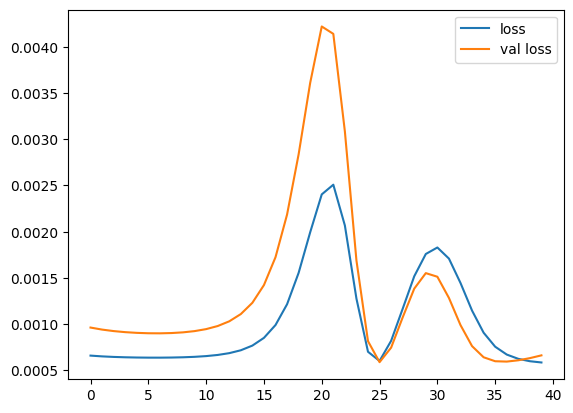

In [30]:
plt.plot(fit_hist.history['loss'][60:],label='loss')
plt.plot(fit_hist.history['val_loss'][60:],label='val loss')
plt.legend() # 이걸 해야 라벨이 뜸.
plt.show()

In [31]:
predict = model.predict(x_test)


5/5 [==============================] - 1s 9ms/step


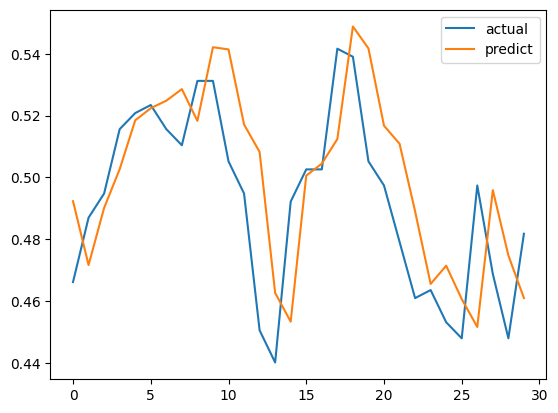

In [32]:
plt.plot(y_test[:30], label='actual')
plt.plot(predict[:30], label='predict')
plt.legend()
plt.show()

In [36]:
last_30_data =scaled_data[-30:].reshape(1,30,6)
today_close = model.predict(last_30_data)
print(today_close)

1/1 [==============================] - 1s 1s/step
[[0.6200484]]


In [41]:
temp = np.array([0,0,0,today_close[0][0],0,0]).reshape(1,6)
today_close_won = minmax_scaler.inverse_transform(temp)
print(today_close_won[0][3],'원')

76409.85870361328 원


-> 여기까지 주가 예측